# Deep Learning Sequential CNN for time series forecasting

In [1]:
from utilities.std_imports import *
from utilities.tf_imports import *
from sklearn.model_selection import train_test_split

### Load data

In [2]:
ds = pd.read_csv(csv_path + 'time_series/emotions.csv')
ds.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


### Preprocess

In [3]:
ds.loc[ds['label'] == 'NEUTRAL', 'label']  = 0 
ds.loc[ds['label'] == 'POSITIVE', 'label'] = 1 
ds.loc[ds['label'] == 'NEGATIVE', 'label'] = 2

In [4]:
X = ds.iloc[:,:-1]
X = np.array(X[:])

y = ds.iloc[:,-1]
y = tku.to_categorical(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state = 120)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1918, 2548), (1918, 3), (214, 2548), (214, 3))

In [6]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

### Build the model

In [7]:
batch_size = 256
num_classes = 3
epochs = 100
input_shape=(X_train.shape[1], 1)

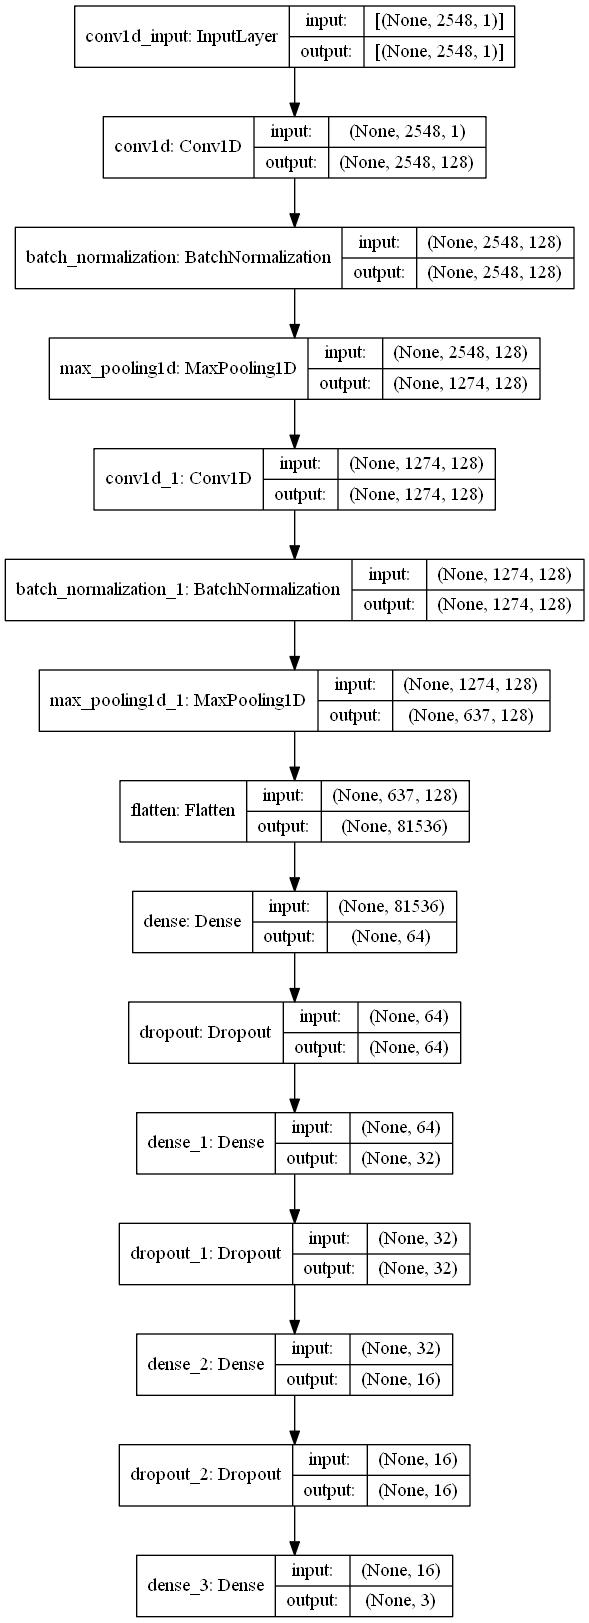

In [8]:
model = tkm.Sequential()
model.add(tkl.Conv1D(128, kernel_size=3,padding = 'same',activation='relu', input_shape=input_shape))
model.add(tkl.BatchNormalization())
model.add(tkl.MaxPooling1D(pool_size=(2)))
model.add(tkl.Conv1D(128,kernel_size=3,padding = 'same', activation='relu'))
model.add(tkl.BatchNormalization())
model.add(tkl.MaxPooling1D(pool_size=(2)))
model.add(tkl.Flatten())
model.add(tkl.Dense(64, activation='tanh'))
model.add(tkl.Dropout(0.2))
model.add(tkl.Dense(32, activation='tanh'))
model.add(tkl.Dropout(0.2))
model.add(tkl.Dense(16, activation='relu'))
model.add(tkl.Dropout(0.2))
model.add(tkl.Dense(num_classes, activation='softmax'))
tku.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=6, verbose=1)

Epoch 1/6
60/60 [==============================] - 29s 465ms/step - loss: 0.2101
Epoch 2/6
60/60 [==============================] - 27s 456ms/step - loss: 0.1626
Epoch 3/6
60/60 [==============================] - 27s 458ms/step - loss: 0.1631
Epoch 4/6
60/60 [==============================] - 27s 457ms/step - loss: 0.1523
Epoch 5/6
60/60 [==============================] - 27s 455ms/step - loss: 0.1611
Epoch 6/6
60/60 [==============================] - 27s 456ms/step - loss: 0.1539


### Prediction

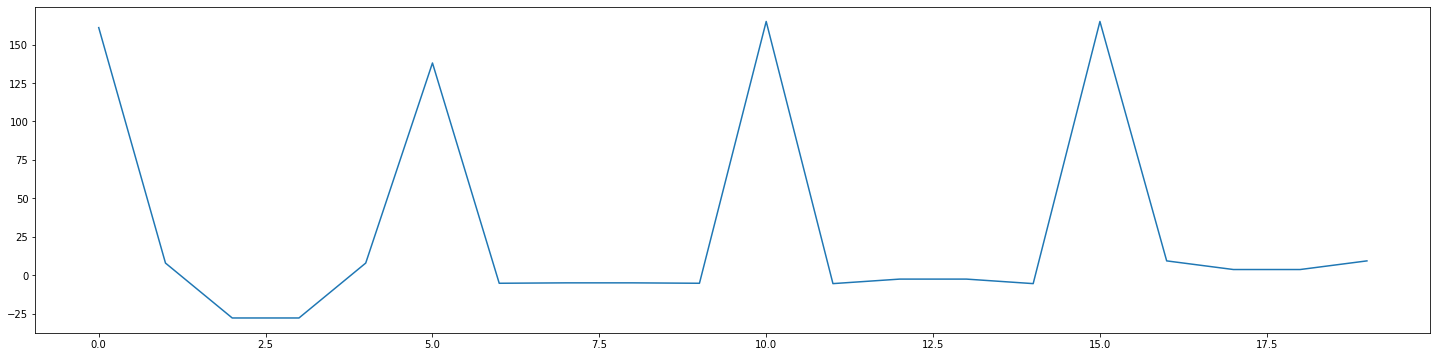

In [49]:
x = X_test[0]
x = x.reshape(1, x.shape[0],x.shape[1])
plt.figure(figsize=[25,6])
plt.plot(x.flatten()[-20:]);

In [35]:
pred = model.predict(x, verbose=0)
print('One step forecast :', round(pred[0][0],2))

One step forecast : 0.06


### Credits & Links

https://medium.com/@Rehan_Sayyad/how-to-use-convolutional-neural-networks-for-time-series-classification-80575131a474